In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/houses.txt')
data.head()

,x1,x2,x3,x4,y
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


In [3]:
xTrain = data.values[:,:-1]
yTrain = data.values[:,-1]

Text(0, 0.5, 'y')

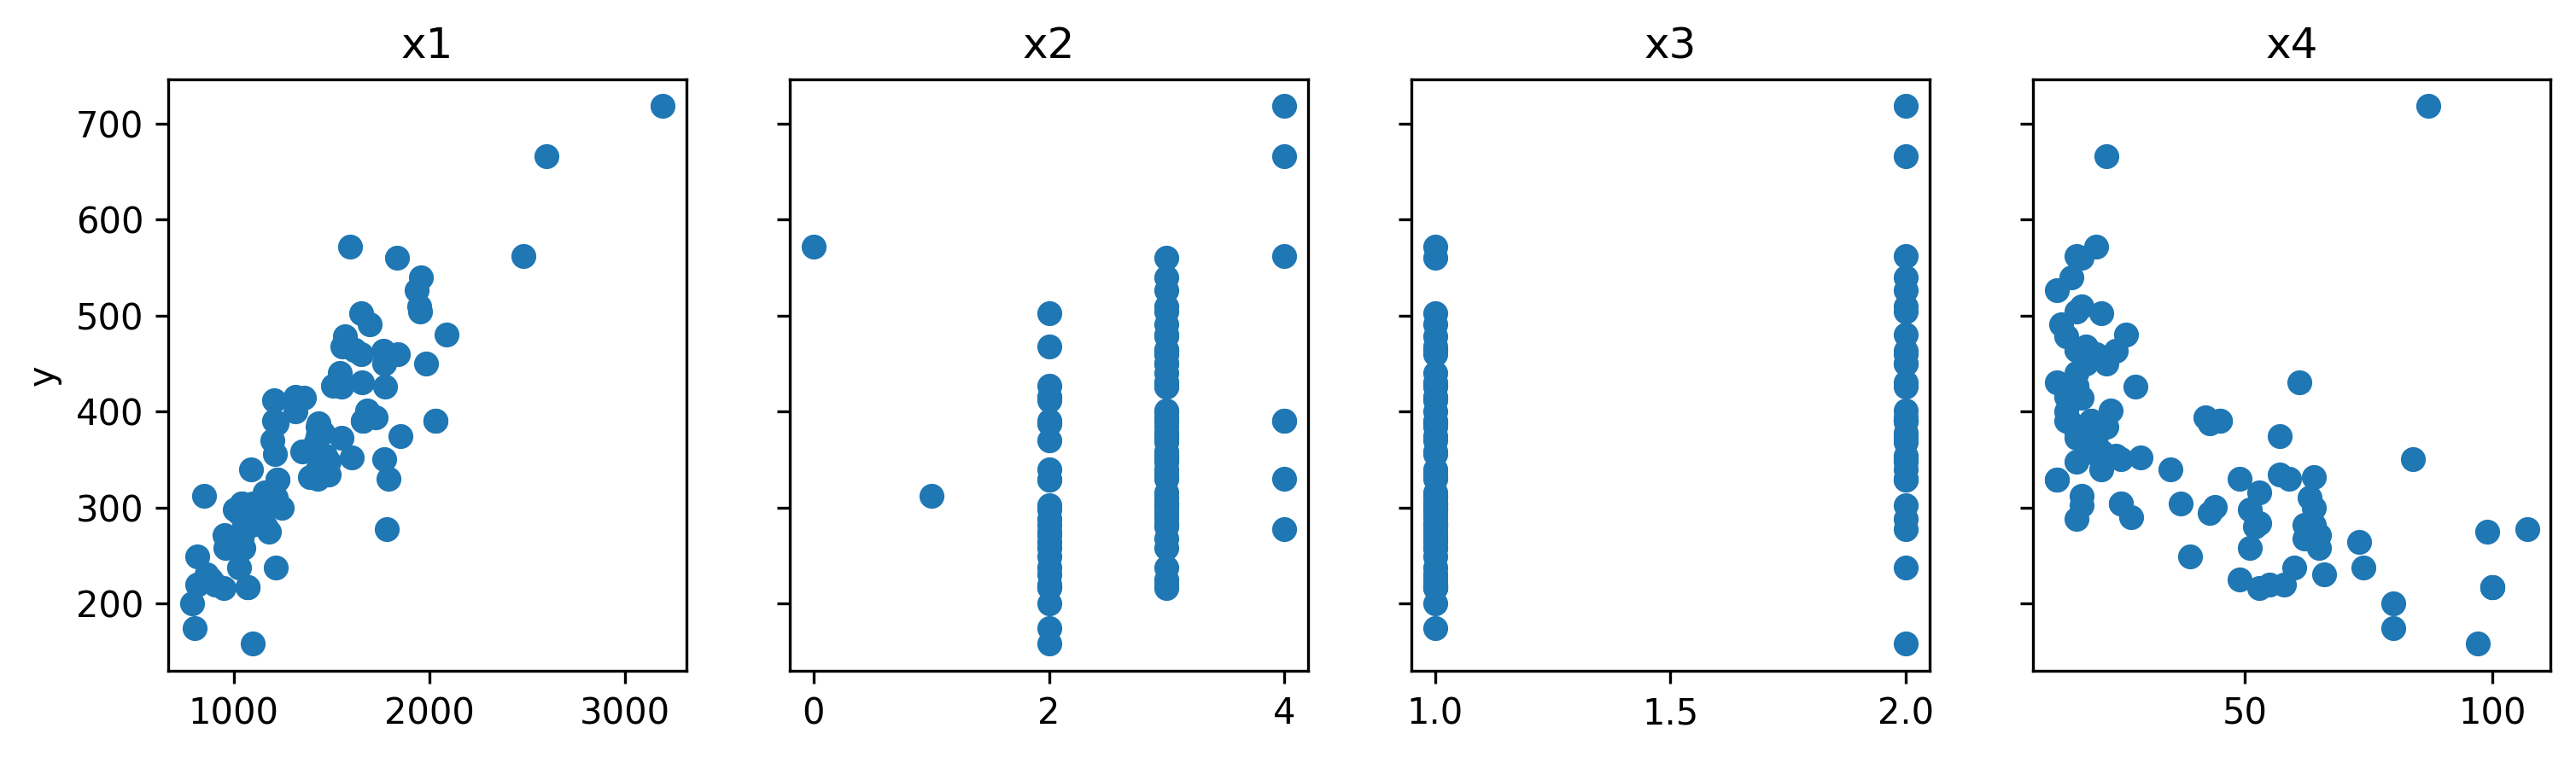

In [4]:
fig,axes = plt.subplots(1,4,figsize=(12,3),sharey=True,dpi=300)
for i in range(4):
    axes[i].scatter(xTrain[:,i],yTrain)
    axes[i].set_title(str(data.columns[i]))
axes[0].set_ylabel(str(data.columns[-1]))

In [5]:
def model(x,y,learningRate,iterations):
    m = y.size
    w = np.zeros(4)
    b = 0
    costList = []
    for i in range(iterations):
        yPredict = np.dot(x,w)+b
        cost = (1/(2*m))*np.sum(np.square(yPredict-y))
        dw = (1/m)*np.dot(x.T,yPredict-y)
        db = (1/m)*(yPredict-y)
        w = w - learningRate*dw
        b = b - learningRate*db
        costList.append(cost)
        if(i%100==0):
            print(f'{i}.cost is {cost}')
    return w,costList

0.cost is 71024.09206744001
100.cost is 1565.1756115690794
200.cost is 1561.0283805043146
300.cost is 1556.956946914905
400.cost is 1552.9599252127286
500.cost is 1549.0359551384036
600.cost is 1545.183701298276
700.cost is 1541.4018527098665
800.cost is 1537.6891223556363
900.cost is 1534.044246744901
1000.cost is 1530.4659854837569
1100.cost is 1526.953120852873
1200.cost is 1523.504457392988
1300.cost is 1520.1188214980034
1400.cost is 1516.7950610154978
1500.cost is 1513.5320448545522
1600.cost is 1510.3286626007432
1700.cost is 1507.1838241381763
1800.cost is 1504.096459278421
1900.cost is 1501.065517396238
2000.cost is 1498.0899670719618
2100.cost is 1495.168795740416
2200.cost is 1492.3010093462558
2300.cost is 1489.4856320055999
2400.cost is 1486.7217056738607
2500.cost is 1484.008289819635
2600.cost is 1481.3444611045593
2700.cost is 1478.7293130690239
2800.cost is 1476.1619558236225
2900.cost is 1473.6415157462482
3000.cost is 1471.167135184726
3100.cost is 1468.7379721648776

Text(0.5, 1.0, 'Cost vs Iterations')

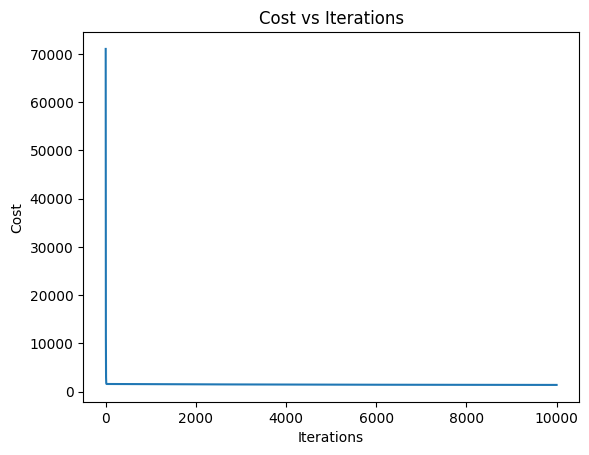

In [6]:
iterations = 10000
learningRate =1e-7
w,costList = model(xTrain,yTrain,learningRate,iterations)
plt.plot(costList)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')

Text(0, 0.5, 'y')

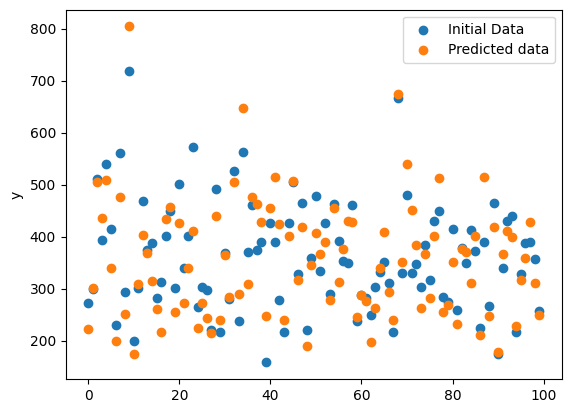

In [7]:
yFinal = np.dot(xTrain,w)
plt.scatter(range(len(yTrain)),yTrain,label='Initial Data')
plt.scatter((range(len(yFinal))),yFinal,label='Predicted data')
plt.legend()
plt.ylabel('y')